In [2]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

X = iris.data[:,0].reshape(-1,1)
Y = iris.data[:,1]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size=0.3, random_state=42) 

In [5]:
complexities = range(1, 16)
train_rmse_list = []
test_rmse_list = []
train_mae_list = []
test_mae_list = []
train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []

print("="*70)
print("BIAS-VARIANCE TRADEOFF ANALYSIS")
print("="*70)
print(f"Dataset: Iris (Sepal Length → Sepal Width)")
print(f"Train size: {len(x_train)}, Test size: {len(x_test)}")
print("="*70)

BIAS-VARIANCE TRADEOFF ANALYSIS
Dataset: Iris (Sepal Length → Sepal Width)
Train size: 45, Test size: 105


In [6]:
for degree in complexities:
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    model = LinearRegression()
    model.fit(x_train_poly,y_train)

    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

     # Calculate gap
    gap = test_rmse - train_rmse
    
    # Diagnosis
    if degree <= 2:
        status = "HIGH BIAS (Underfitting)"
    elif degree <= 5:
        status = "OPTIMAL"
    else:
        status = "HIGH VARIANCE (Overfitting)"
    
    print(f"\nDegree {degree:2d} | {status}")
    print(f"  Train - RMSE: {train_rmse:.4f} | MAE: {train_mae:.4f} | MSE: {train_mse:.4f} | R²: {train_r2:.4f}")
    print(f"  Test  - RMSE: {test_rmse:.4f} | MAE: {test_mae:.4f} | MSE: {test_mse:.4f} | R²: {test_r2:.4f}")
    print(f"  Gap (Test-Train RMSE): {gap:.4f}")

print("\n" + "="*70)


Degree  1 | HIGH BIAS (Underfitting)
  Train - RMSE: 0.3696 | MAE: 0.2729 | MSE: 0.1366 | R²: 0.0021
  Test  - RMSE: 0.4593 | MAE: 0.3551 | MSE: 0.2110 | R²: -0.0054
  Gap (Test-Train RMSE): 0.0898

Degree  2 | HIGH BIAS (Underfitting)
  Train - RMSE: 0.3695 | MAE: 0.2748 | MSE: 0.1365 | R²: 0.0025
  Test  - RMSE: 0.4615 | MAE: 0.3577 | MSE: 0.2130 | R²: -0.0149
  Gap (Test-Train RMSE): 0.0920

Degree  3 | OPTIMAL
  Train - RMSE: 0.3674 | MAE: 0.2824 | MSE: 0.1350 | R²: 0.0140
  Test  - RMSE: 0.4530 | MAE: 0.3626 | MSE: 0.2052 | R²: 0.0220
  Gap (Test-Train RMSE): 0.0857

Degree  4 | OPTIMAL
  Train - RMSE: 0.3478 | MAE: 0.2490 | MSE: 0.1210 | R²: 0.1161
  Test  - RMSE: 0.5999 | MAE: 0.4163 | MSE: 0.3599 | R²: -0.7150
  Gap (Test-Train RMSE): 0.2521

Degree  5 | OPTIMAL
  Train - RMSE: 0.3477 | MAE: 0.2508 | MSE: 0.1209 | R²: 0.1166
  Test  - RMSE: 0.6291 | MAE: 0.4249 | MSE: 0.3958 | R²: -0.8858
  Gap (Test-Train RMSE): 0.2814

Degree  6 | HIGH VARIANCE (Overfitting)
  Train - RMSE: 

In [7]:
import matplotlib.pyplot as plt

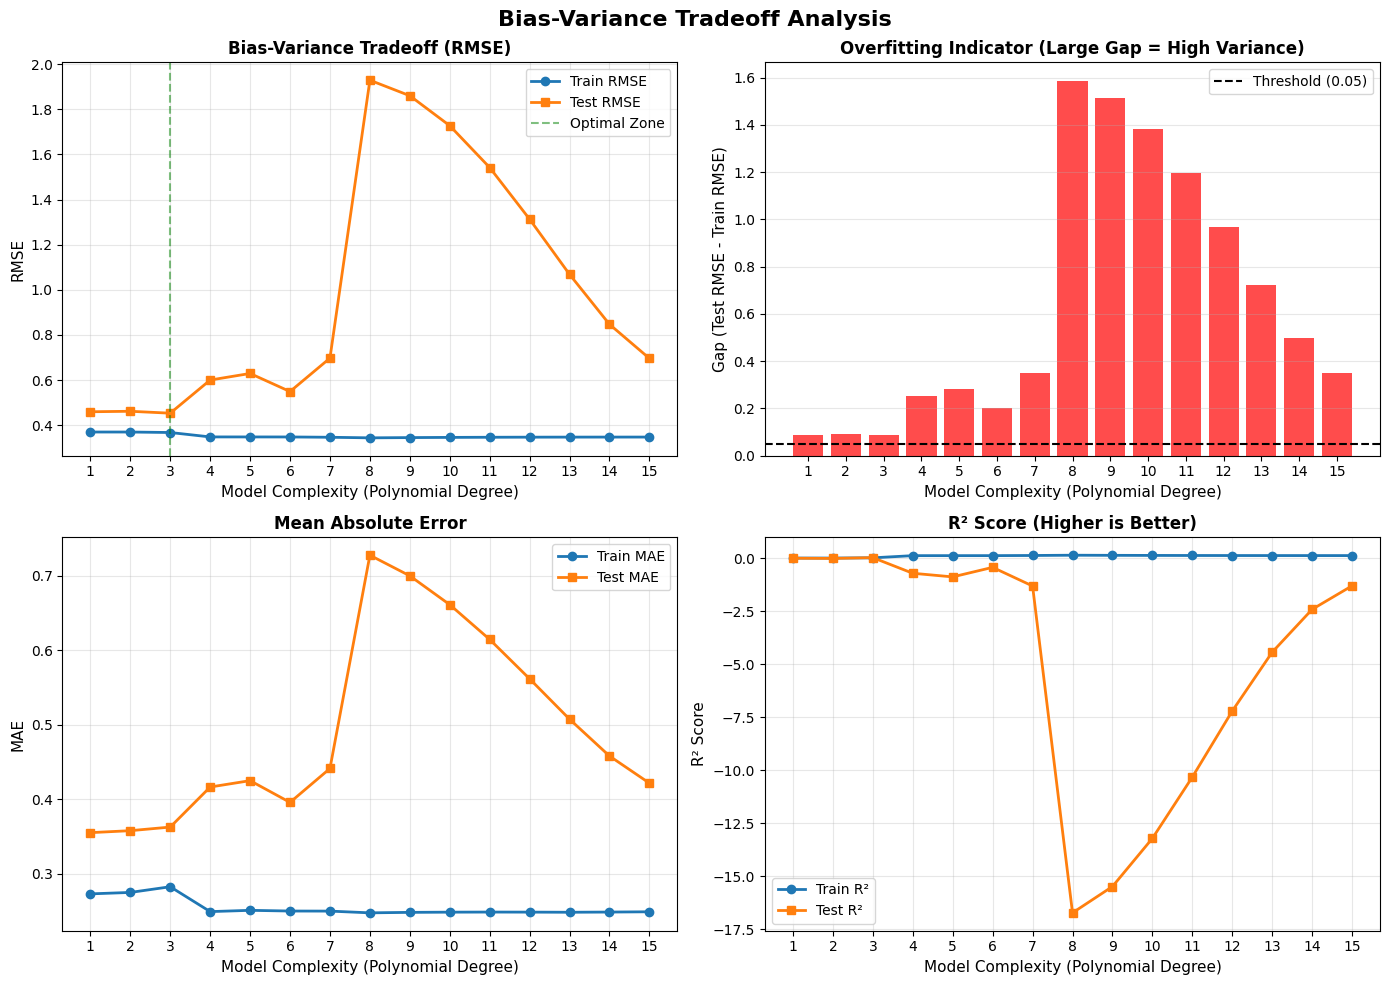

In [10]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bias-Variance Tradeoff Analysis', fontsize=16, fontweight='bold')

# 1. RMSE Comparison (Main tradeoff curve)
axes[0, 0].plot(complexities, train_rmse_list, 'o-', label='Train RMSE', linewidth=2, markersize=6)
axes[0, 0].plot(complexities, test_rmse_list, 's-', label='Test RMSE', linewidth=2, markersize=6)
axes[0, 0].axvline(x=3, color='green', linestyle='--', alpha=0.5, label='Optimal Zone')
axes[0, 0].set_xlabel('Model Complexity (Polynomial Degree)', fontsize=11)
axes[0, 0].set_ylabel('RMSE', fontsize=11)
axes[0, 0].set_title('Bias-Variance Tradeoff (RMSE)', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(complexities)

# 2. Train-Test Gap
gaps = [test - train for test, train in zip(test_rmse_list, train_rmse_list)]
axes[0, 1].bar(complexities, gaps, color=['red' if g > 0.05 else 'green' for g in gaps], alpha=0.7)
axes[0, 1].axhline(y=0.05, color='black', linestyle='--', label='Threshold (0.05)')
axes[0, 1].set_xlabel('Model Complexity (Polynomial Degree)', fontsize=11)
axes[0, 1].set_ylabel('Gap (Test RMSE - Train RMSE)', fontsize=11)
axes[0, 1].set_title('Overfitting Indicator (Large Gap = High Variance)', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_xticks(complexities)

# 3. MAE Comparison
axes[1, 0].plot(complexities, train_mae_list, 'o-', label='Train MAE', linewidth=2, markersize=6)
axes[1, 0].plot(complexities, test_mae_list, 's-', label='Test MAE', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Model Complexity (Polynomial Degree)', fontsize=11)
axes[1, 0].set_ylabel('MAE', fontsize=11)
axes[1, 0].set_title('Mean Absolute Error', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(complexities)

# 4. R² Score
axes[1, 1].plot(complexities, train_r2_list, 'o-', label='Train R²', linewidth=2, markersize=6)
axes[1, 1].plot(complexities, test_r2_list, 's-', label='Test R²', linewidth=2, markersize=6)
axes[1, 1].set_xlabel('Model Complexity (Polynomial Degree)', fontsize=11)
axes[1, 1].set_ylabel('R² Score', fontsize=11)
axes[1, 1].set_title('R² Score (Higher is Better)', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(complexities)

plt.tight_layout()
plt.show()

In [9]:
# Summary
print("\n📊 KEY OBSERVATIONS:")
print("="*70)
optimal_idx = np.argmin(test_rmse_list)
optimal_degree = complexities[optimal_idx]
print(f"✓ Optimal Model Complexity: Degree {optimal_degree}")
print(f"✓ Best Test RMSE: {test_rmse_list[optimal_idx]:.4f}")
print(f"✓ At Degree 1-2: High Bias (Underfitting) - Both errors are high")
print(f"✓ At Degree {optimal_degree}: Optimal - Lowest test error")
print(f"✓ At Degree 10+: High Variance (Overfitting) - Large gap between train/test")
print("="*70)


📊 KEY OBSERVATIONS:
✓ Optimal Model Complexity: Degree 3
✓ Best Test RMSE: 0.4530
✓ At Degree 1-2: High Bias (Underfitting) - Both errors are high
✓ At Degree 3: Optimal - Lowest test error
✓ At Degree 10+: High Variance (Overfitting) - Large gap between train/test
